In [43]:
import numpy as np
import sys
from tqdm import tqdm
sys.path.append("../src")

from scipy.stats import norm
from multitest import MultiTest
from matplotlib import pyplot as plt

In [44]:
r = 1.
n = 1000
be = 0.7
sig = 1

mu = np.sqrt(2 * r * np.log(n))
ep = n ** -be
idcs1 = np.random.rand(n) < ep / 2
idcs2 = np.random.rand(n) < ep / 2

Z1 = np.random.randn(n)
Z2 = np.random.randn(n)

Z1[idcs1] = sig*Z1[idcs1] + mu
Z2[idcs2] = sig*Z2[idcs2] + mu

Z = (Z1 - Z2)/np.sqrt(2)
pvals = 2*norm.cdf(- np.abs(Z))

_hc = MultiTest(pvals)
hc, hct = _hc.hc()

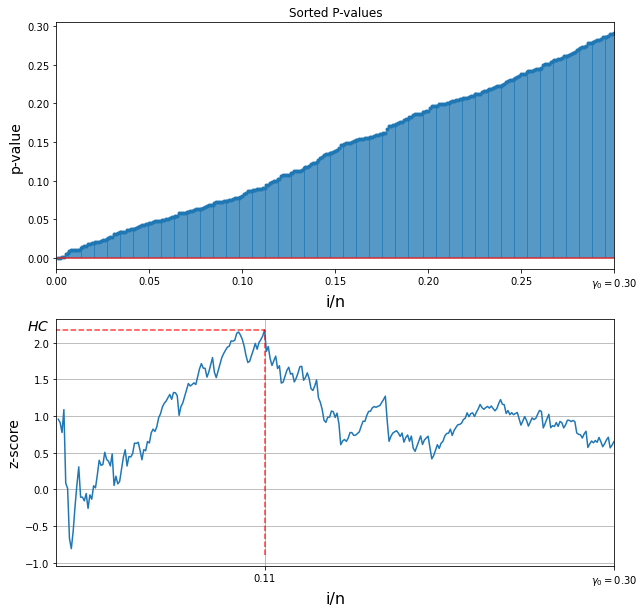

In [50]:
gamma = 0.3

imin = 0
imin_jin = _hc._imin_jin
imin_star = _hc._imin_star
N = _hc._N
istar = _hc._istar

imax = np.maximum(imin, int(gamma * _hc._N + 0.5))

ax = plt.subplot(211)
yy = np.sort(_hc._pvals)[imin:imax]
xx = _hc._uu[imin:imax]
ax.stem(xx, yy, markerfmt='.')
ax.plot([(istar+1) / N, (istar+1) / N],[0, hct], '--r', alpha=.75)
ax.set_ylabel('p-value', fontsize=14)
ax.set_title('Sorted P-values')
ax.set_xlim([0,imax/N])
ax.set_xlabel('i/n', fontsize=16)

labels = ax.get_xticklabels()
labels[-1].set_text(r"$\gamma_0=$" + labels[-1]._text)
ax.set_xticks(ticks=[l._x for l in labels], labels = labels)

ax = plt.subplot(212)
idcs = np.argsort(np.abs(_hc._zz))[imin:imax]
ax.plot(xx, _hc._zz[imin:imax])
ymax = np.max(_hc._zz[imin:imax]) * 1.1
ymin = np.min(_hc._zz[imin:imax]) * 1.1
ax.plot([(istar+1) / N, (istar+1) / N],[ymin, hc], '--r', alpha=.75)

ax.plot([ymin, (istar+1)/N], [hc, hc], '--r', alpha=.75)
ax.text(-0.01, hc, r'$HC$', horizontalalignment='center', fontsize=14,
       bbox=dict(boxstyle="round",
                   ec=(1., 1, 1),
                   fc=(1., 1, 1),
                   alpha=0.5,
                   ))

ax.set_ylabel('z-score', fontsize=14)
#ax.set_title('z-scores', fontsize=14)
ax.grid(True)
ax.set_xlim([0,imax/N])
ax.set_xlabel('i/n', fontsize=16)


label = ax.get_xticklabels()[-1]
label.set_text(r"$\gamma_0=$" + label._text)
ax.set_xticks(ticks=[label._x, (istar + 1) / N], labels = [label, str(np.round((istar + 1) / N,2))])

fig = plt.gcf()
fig.set_size_inches(10, 10, forward=True)

plt.show()


In [42]:
np.sum(_hc._pvals <= _hc.fdr()[1])

1

matplotlib.text.Text

NameError: name 'matplotlib' is not defined

In [170]:
label

Text(0.30000000000000004, 0, '0.30')